In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

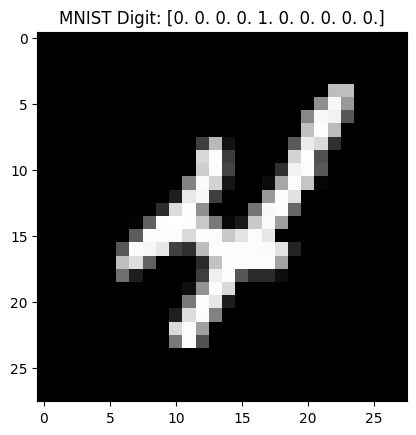

In [12]:
image_index = 9  # Change this index to display a different image

# Get the image and label
selected_image = x_train[image_index]
label = y_train[image_index]

# Display the grayscale image
plt.imshow(selected_image, cmap='gray')
plt.title(f'MNIST Digit: {label}')
plt.show()

In [15]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Epoch 1/5
938/938 [==============================] - 15s 15ms/step - loss: 0.2011 - accuracy: 0.9423 - val_loss: 0.0797 - val_accuracy: 0.9732
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0612 - accuracy: 0.9812 - val_loss: 0.0508 - val_accuracy: 0.9831
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0340 - val_accuracy: 0.9880
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9883
Test loss: 0.0372806116938591
Test accuracy: 0.9883000254631042


In [14]:
# Save the model as a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ISAACS~1\AppData\Local\Temp\tmp4rkwlacb\assets


INFO:tensorflow:Assets written to: C:\Users\ISAACS~1\AppData\Local\Temp\tmp4rkwlacb\assets
